In [2]:
!pip install tensorflow
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [41]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS = 50

In [30]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/MyDrive/PlantVillage",
    shuffle=True,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
)

Found 2152 files belonging to 3 classes.


In [31]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

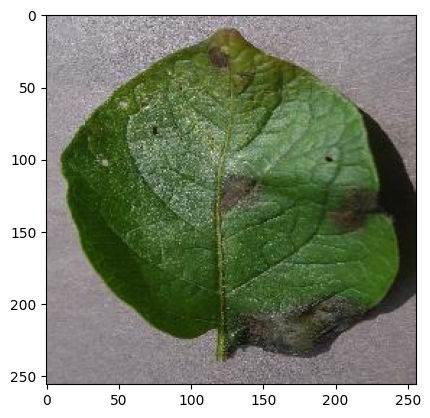

In [40]:
for image_batch, label_batch in dataset.take(1):
  plt.imshow(image_batch[0].numpy().astype("uint8"))


In [43]:
train_size = 0.8
len(dataset) * train_size

54.400000000000006

In [44]:
train_ds = dataset.take(54)
len(train_ds)

54

In [51]:
test_ds = dataset.skip(54)
len(dataset) * 0.1

6.800000000000001

In [53]:
val_ds = test_ds.take(6)
len(val_ds)

6

In [54]:
test_ds = test_ds.skip(6)
len(test_ds)

8

In [62]:
def get_dataset_partitions_tf(ds, train_split = 0.8, val_split=0.1, test_split=0.1,shuffle=True, shuffle_size=10000):
  ds_size = len(ds)

  if shuffle:
    ds = ds.shuffle(shuffle_size, seed=12)

  train_size = int(train_split * ds_size)
  val_size = int(val_split * ds_size)

  train_ds = ds.take(train_size)

  val_ds  = ds.skip(train_size).take(val_size)
  test_ds  = ds.skip(train_size).skip(val_size)

  return train_ds, val_ds, test_ds

In [64]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

6